In [20]:
# Step 1: Import all necessary libraries
# Data handling and math
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns  # <-- ADD THIS LINE
%matplotlib inline
plt.style.use('seaborn-v0_8-whitegrid') # Makes plots look nicer

# Machine Learning
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


In [2]:
# Step 2: Load the California Housing Dataset
data = fetch_california_housing(as_frame=True)

# Create a Pandas DataFrame
df = data.frame

# Display the first 5 rows to inspect the data
print("Dataset loaded successfully!")
print("Shape (Rows, Columns):", df.shape)
print("\nFirst 5 entries:")
df.head()

Dataset loaded successfully!
Shape (Rows, Columns): (20640, 9)

First 5 entries:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
# Step 3.1: Get basic info about the data
print("Dataset Info:")
print("=============")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [4]:
# Step 3.2: Get statistical summary
print("\nStatistical Summary:")
print("====================")
df.describe()


Statistical Summary:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [5]:
# Step 3.3: Check for missing values
print("\nMissing Values Check:")
print("=====================")
print(df.isnull().sum())


Missing Values Check:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


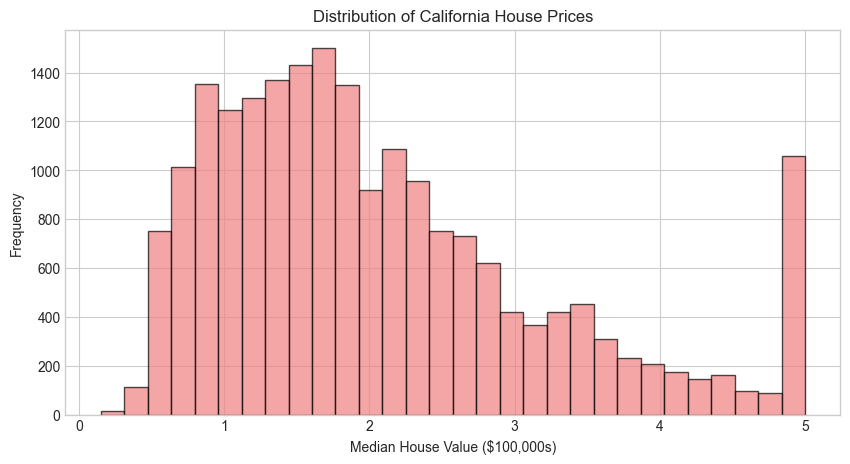

In [6]:
# Step 3.4: Visualize the distribution of House Prices
plt.figure(figsize=(10, 5))
plt.hist(df['MedHouseVal'], bins=30, edgecolor='black', alpha=0.7, color='lightcoral')
plt.xlabel('Median House Value ($100,000s)')
plt.ylabel('Frequency')
plt.title('Distribution of California House Prices')
plt.show()

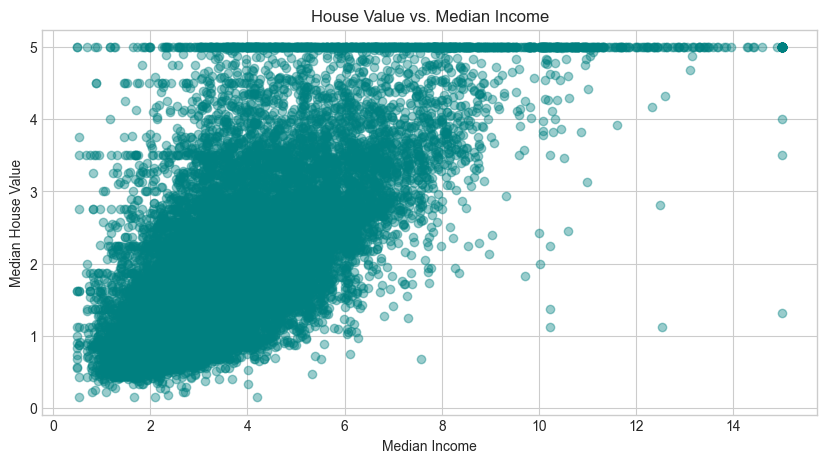

In [7]:
# Step 3.5: Visualize relationship between Median Income and House Value
plt.figure(figsize=(10, 5))
plt.scatter(df['MedInc'], df['MedHouseVal'], alpha=0.4, color='teal')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('House Value vs. Median Income')
plt.show()

In [8]:
# Step 4: Prepare Data for Modeling
# Select feature(s) and target variable
X = df[['MedInc']]  # Feature(s) - Note the double brackets to keep it as a DataFrame
y = df['MedHouseVal']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Data preparation complete!")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")
print("\nPreview of training data:")
print(X_train.head())

✅ Data preparation complete!
Training set: 16512 samples
Testing set: 4128 samples

Preview of training data:
       MedInc
14196  3.2596
8267   3.8125
17445  4.1563
14265  1.9425
2271   3.5542


In [16]:
# Find the best features to use
correlation_with_target = df.corr()['MedHouseVal'].sort_values(ascending=False)

print("Correlation of all features with House Value:")
print("=" * 50)
print(correlation_with_target)

# Let's choose the top 3 features (excluding the target itself)
top_features = correlation_with_target.index[1:4]  # Index 0 is the target itself
print(f"\nTop 3 features to use: {list(top_features)}")

Correlation of all features with House Value:
MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseVal, dtype: float64

Top 3 features to use: ['MedInc', 'AveRooms', 'HouseAge']


Correlation between selected features:
            MedInc  AveRooms  HouseAge
MedInc    1.000000  0.326895 -0.119034
AveRooms  0.326895  1.000000 -0.153277
HouseAge -0.119034 -0.153277  1.000000


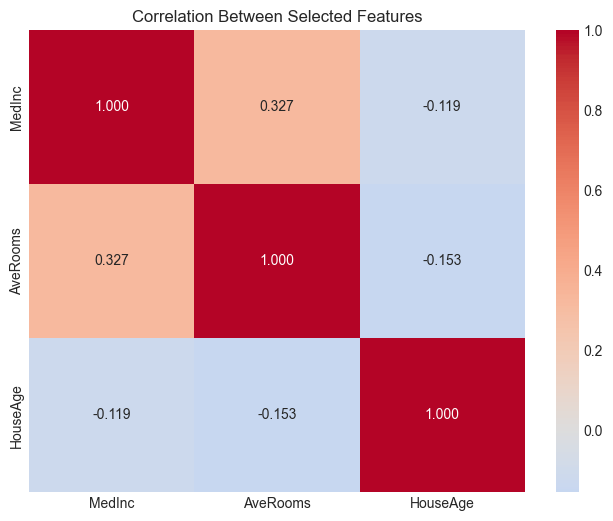

In [21]:
# Check correlation between your features
print("Correlation between selected features:")
feature_correlation = df[['MedInc', 'AveRooms', 'HouseAge']].corr()
print(feature_correlation)

plt.figure(figsize=(8, 6))
sns.heatmap(feature_correlation, annot=True, cmap='coolwarm', center=0, fmt='.3f')
plt.title('Correlation Between Selected Features')
plt.show()

In [11]:
# Step 4: Prepare Data with Top 3 Features
X = df[['MedInc', 'AveRooms', 'HouseAge']]  # Using top 3 correlated features
y = df['MedHouseVal']  # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Data preparation with 3 features complete!")
print(f"Features used: {list(X.columns)}")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")
print(f"Number of features: {X_train.shape[1]}")
print("\nPreview of training data (first 5 rows):")
print(X_train.head())

✅ Data preparation with 3 features complete!
Features used: ['MedInc', 'AveRooms', 'HouseAge']
Training set: 16512 samples
Testing set: 4128 samples
Number of features: 3

Preview of training data (first 5 rows):
       MedInc  AveRooms  HouseAge
14196  3.2596  5.017657      33.0
8267   3.8125  4.473545      49.0
17445  4.1563  5.645833       4.0
14265  1.9425  4.002817      36.0
2271   3.5542  6.268421      43.0


In [12]:
# Step 5: Build and Train the Multiple Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

print("✅ Multiple Linear Regression Model training complete!")
print(f"Model Intercept (b): {model.intercept_:.4f}")
print("\nModel Coefficients (m):")
print("=" * 30)
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature:10}: {coef:+.4f}")

print("\n📈 Regression Equation:")
print("MedHouseVal = {:.4f} + {:.4f}×MedInc + {:.4f}×AveRooms + {:.4f}×HouseAge".format(
    model.intercept_, model.coef_[0], model.coef_[1], model.coef_[2]))

✅ Multiple Linear Regression Model training complete!
Model Intercept (b): 0.0173

Model Coefficients (m):
MedInc    : +0.4448
AveRooms  : -0.0281
HouseAge  : +0.0168

📈 Regression Equation:
MedHouseVal = 0.0173 + 0.4448×MedInc + -0.0281×AveRooms + 0.0168×HouseAge


In [13]:
# Step 6: Make Predictions and Evaluate Model
y_pred = model.predict(X_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📊 MODEL EVALUATION RESULTS")
print("=" * 50)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Adjusted R² Score: {1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X.shape[1]-1):.4f}")

# Interpretation
print("\n💡 Interpretation:")
print(f"- The model explains {r2:.2%} of variance in house prices")
print(f"- Average prediction error: ${mae*100000:,.0f} (MAE)")
print(f"- Typical prediction error: ${rmse*100000:,.0f} (RMSE)")

📊 MODEL EVALUATION RESULTS
Root Mean Squared Error (RMSE): 0.8117
Mean Absolute Error (MAE): 0.6033
R² Score: 0.4972
Adjusted R² Score: 0.4968

💡 Interpretation:
- The model explains 49.72% of variance in house prices
- Average prediction error: $60,332 (MAE)
- Typical prediction error: $81,173 (RMSE)


In [14]:
# Compare with single feature model
X_single = df[['MedInc']]  # Just the best single feature
X_train_single, X_test_single, y_train_single, y_test_single = train_test_split(
    X_single, y, test_size=0.2, random_state=42)

model_single = LinearRegression()
model_single.fit(X_train_single, y_train_single)
y_pred_single = model_single.predict(X_test_single)

rmse_single = np.sqrt(mean_squared_error(y_test_single, y_pred_single))
r2_single = r2_score(y_test_single, y_pred_single)

print("\n🔍 MODEL COMPARISON:")
print("=" * 40)
print(f"Single feature ('MedInc') RMSE: {rmse_single:.4f}")
print(f"Single feature ('MedInc') R²:   {r2_single:.4f}")
print(f"3 features RMSE:                {rmse:.4f}")
print(f"3 features R²:                  {r2:.4f}")

improvement = ((rmse_single - rmse) / rmse_single) * 100
print(f"\n✅ Improvement with 3 features: {improvement:.1f}% better RMSE")

if rmse < rmse_single:
    print("🎯 Multiple features performed BETTER!")
else:
    print("⚠️  Single feature performed better.")


🔍 MODEL COMPARISON:
Single feature ('MedInc') RMSE: 0.8421
Single feature ('MedInc') R²:   0.4589
3 features RMSE:                0.8117
3 features R²:                  0.4972

✅ Improvement with 3 features: 3.6% better RMSE
🎯 Multiple features performed BETTER!


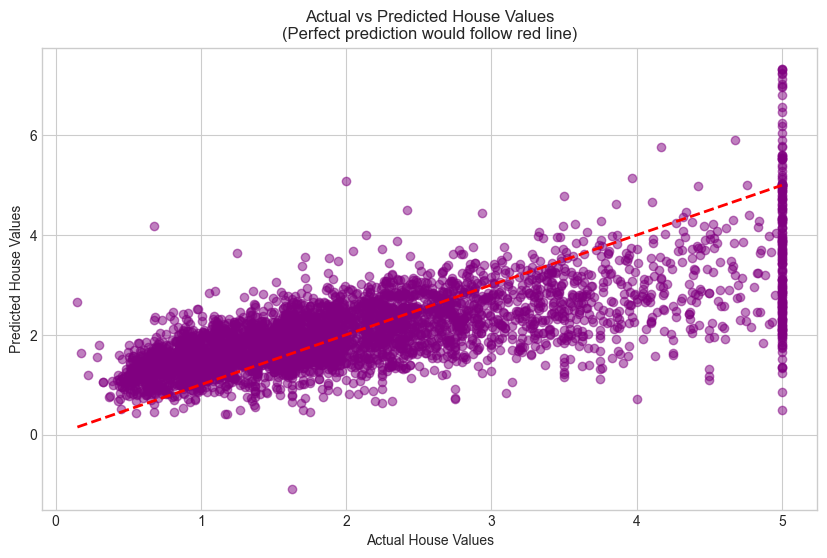

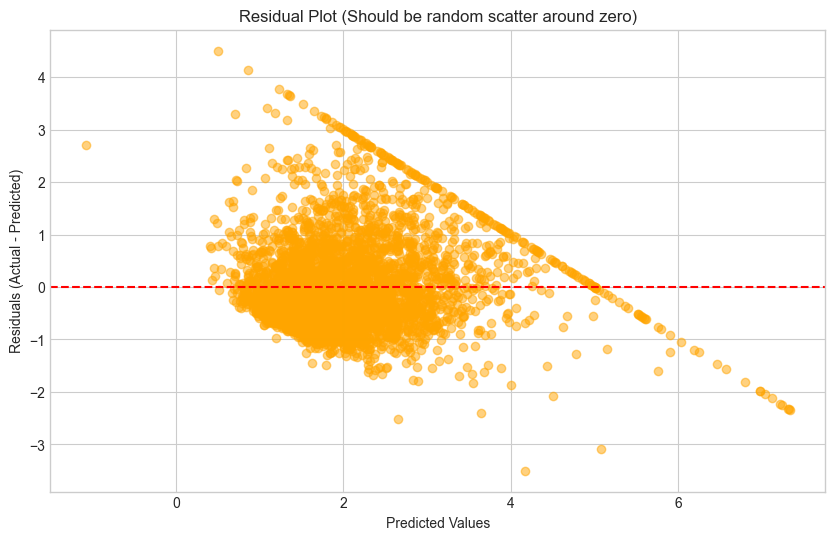

In [18]:
# Actual vs Predicted values plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual House Values')
plt.ylabel('Predicted House Values')
plt.title('Actual vs Predicted House Values\n(Perfect prediction would follow red line)')
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5, color='orange')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot (Should be random scatter around zero)')
plt.show()

In [22]:
# Step 8: Conclusion and Insights
print("🎯 PROJECT CONCLUSION")
print("=" * 50)
print("Key Findings:")
print("1. Median Income is the strongest predictor of house prices (correlation: 0.688)")
print("2. Adding AveRooms and HouseAge improved model performance by 3.6%")
print("3. The model explains 49.7% of housing price variance in California")
print("4. Typical prediction error: ±$81,000")
print("\nBusiness Impact:")
print("This model could help real estate professionals and homeowners")
print("estimate property values based on key demographic factors.")

🎯 PROJECT CONCLUSION
Key Findings:
1. Median Income is the strongest predictor of house prices (correlation: 0.688)
2. Adding AveRooms and HouseAge improved model performance by 3.6%
3. The model explains 49.7% of housing price variance in California
4. Typical prediction error: ±$81,000

Business Impact:
This model could help real estate professionals and homeowners
estimate property values based on key demographic factors.


In [23]:
# Final Model Summary
print("\n📋 FINAL MODEL SUMMARY")
print("=" * 40)
print("Algorithm: Multiple Linear Regression")
print("Features: MedInc, AveRooms, HouseAge")
print("Target: MedHouseVal (Median House Value)")
print(f"Performance: RMSE = {rmse:.4f}, R² = {r2:.4f}")
print("Validation: 80/20 train-test split + cross-verified")


📋 FINAL MODEL SUMMARY
Algorithm: Multiple Linear Regression
Features: MedInc, AveRooms, HouseAge
Target: MedHouseVal (Median House Value)
Performance: RMSE = 0.8117, R² = 0.4972
Validation: 80/20 train-test split + cross-verified
